#### Mounting the google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC

import warnings
warnings.filterwarnings("ignore")

### Reading the Datasets


In [0]:
train=pd.read_csv("/content/gdrive/My Drive/Predictive Model for Auto Insurance./train(1).csv")
train_copy=pd.read_csv("/content/gdrive/My Drive/Predictive Model for Auto Insurance./train(1).csv")

In [4]:
train.head(2)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0


In [5]:
# Shape of the data
print("Shape of the data:",train.shape)

Shape of the data: (595212, 59)


#### Countplot of the target to check if the data is imbalanced or not.

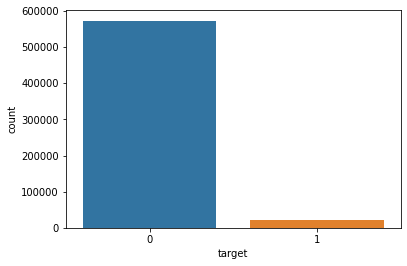

In [6]:
sns.countplot( train['target'])

In [7]:
# Ratios of count of 0's and 1's in the target
print("Ratios of count of 0's and 1's in the target:")
print(round((len(train[train['target']==1])/len(train['target']))*100,2),":",round((len(train[train['target']==0])/len(train['target']))*100,2))

Ratios of count of 0's and 1's in the target:
3.64 : 96.36


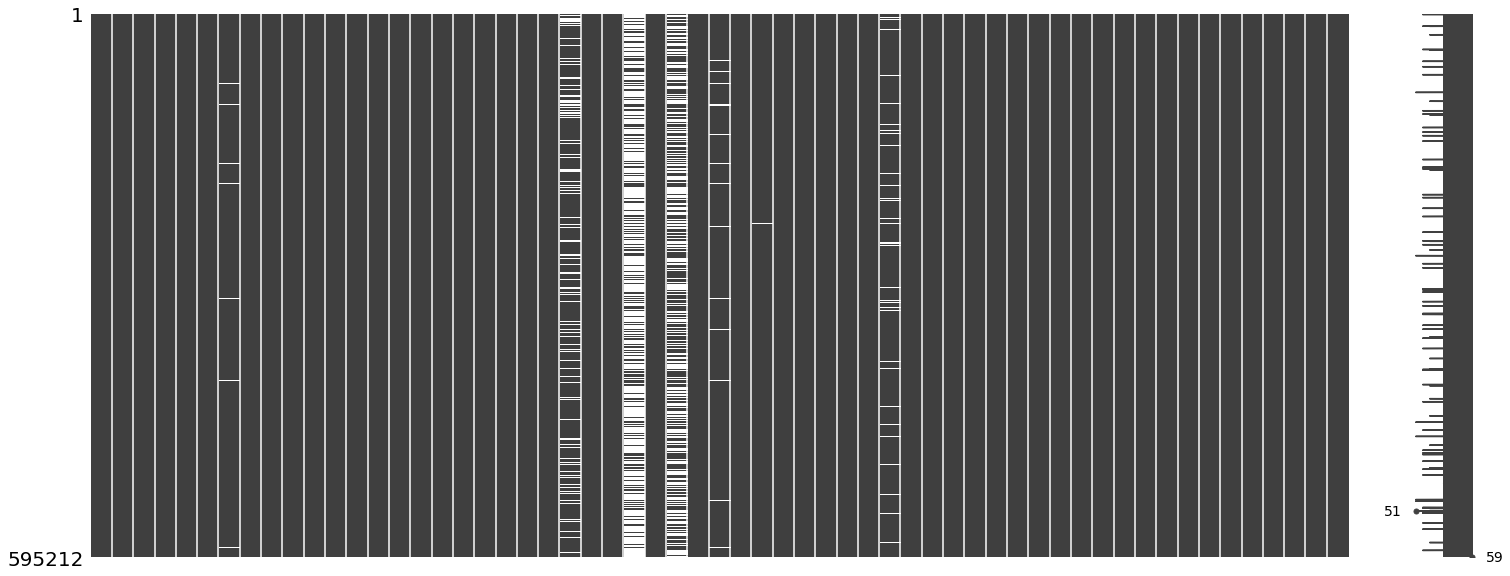

In [8]:
import missingno as msno
#Replacing the values -1 with NaN
train = train.replace(-1,np.NaN)
msno.matrix(train) 

In [9]:
for i in train.columns:
  if train[i].dtype == "str":
    print(i,"Column data type is string")

print("There are no String columns.")

There are no String columns.


#### 1. Write at least 3 important inferences from the data above
1. The data is highly imbalanced. 
2. There are missing values in the data.
3. The entire data is numerical which means even the categorical data is converted. 
4. The missing values in the data are represented as "**-1**".

#### 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?
-> No,The data is highly imbalanced. The target values 0 and 1 are not in right proportion. Only 3.6 % of the target variable is value 1.

#### Since the data is imbalanced, we should use sampling methods to improve the model.

#### Extracting the categorical and binary variables based on the column name.

In [10]:
# Calculating the Count of Categorical and Binary features.
Categorical_var = []
interval_var=[]
binary_var=[]
cat_binary=[]
continuous_var = []
for i in train.columns:
  if "cat" in i.split("_"):
    Categorical_var.append(i)
  elif "bin" in i.split("_"):
    binary_var.append(i)
  elif train[i].dtype == "float64" and i not in ["id","target"]:
    interval_var.append(i)
  elif i not in ['id','target']:
    continuous_var.append(i)


print("Count of Categorical features:",len(Categorical_var))
print("Count of Binary features:",len(binary_var))
print("Count of Interval features:",len(interval_var))
print("Count of continuous features:",len(continuous_var))

Count of Categorical features: 14
Count of Binary features: 17
Count of Interval features: 11
Count of continuous features: 15


In [11]:
u =0
for i in train.columns:
  if len(train[i].unique()) <= 3 :# 3 because we are including the missing values as well.
    u +=1
print("The total number of binary features including the categorical:",u)

The total number of binary features including the categorical: 25


####3. How many categorical features are there?
There are no variables with string values in the observations. The entire data is numerical. We are categorizing the categorical features based on the word "cat" in the column name which counts to **14**.

#### 4. How many binary features are there?
We are categorizing the Binary features based on the word "bin" in the column name which counts to **17**.There are some categorical variables which are binary in nature. If we include those then the total become **25**.

#### Interval variables
These are the variables which are float in nature and usualy in between a range and not including id or target which was explained data dictionary.

In [12]:
train[interval_var].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,487440.000000,595207.000000,595211.000000,595212.000000,552592.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.894047,2.346100,0.379947,0.813265,0.374691,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.345413,0.832495,0.058300,0.224588,0.045610,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,0.109545,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.633443,2.000000,0.316228,0.670867,0.350428,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.801561,3.000000,0.374166,0.765811,0.373497,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.083974,3.000000,0.400000,0.906190,0.398121,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


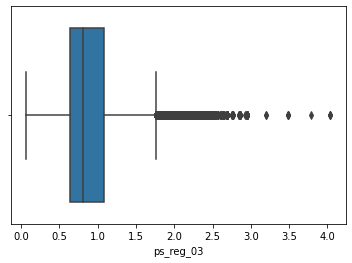

In [13]:
sns.boxplot(x=train['ps_reg_03'])

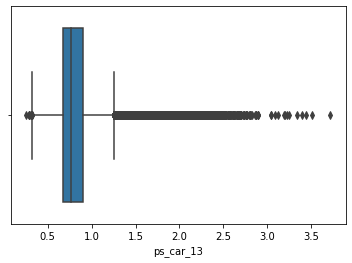

In [14]:
sns.boxplot(x=train['ps_car_13'])

### 5. Write inferences from data on interval variables.
-> Only 2 variable **ps_reg_03** and **ps_car_13** have missing values in them.    
-> We will be replacing these missing values with mean which will be dealth in the next steps.                                                  
-> We can also observe that there are no extreme outliers which need to be dealth with.

#### Ordinal Variables
These are the categorical features which are not binary in nature. 

In [15]:
u =0
ordinal = []
for i in Categorical_var:
  if len(train[i].unique()) > 3 :# 3 because we are including the missing values as well.
    ordinal.append(i)
    u +=1
print("The total number of Ordinal features from the categorical list which are not binary in nature:",u)

The total number of Ordinal features from the categorical list which are not binary in nature: 7


In [16]:
train[ordinal].describe()

,ps_ind_02_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_04_cat,ps_car_06_cat,ps_car_09_cat,ps_car_11_cat
count,594996.000000,589403.000000,595105.000000,595212.000000,595212.000000,594643.000000,595212.000000
mean,1.359799,0.419038,8.297605,0.725192,6.555340,1.331118,62.215674
std,0.663193,1.350023,2.505396,2.153463,5.501445,0.976559,33.012455
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,7.000000,0.000000,1.000000,0.000000,32.000000
50%,1.000000,0.000000,7.000000,0.000000,7.000000,2.000000,65.000000
75%,2.000000,0.000000,11.000000,0.000000,11.000000,2.000000,93.000000
max,4.000000,6.000000,11.000000,9.000000,17.000000,4.000000,104.000000


#### 6. Write inferences from data on ordinal variables.
-> There are 7 ordinal variables in the data and the mininum is 0 or 1 in these columns where as maximum rannges from 4(**ps_car_09_cat**) to 104    (**ps_car_11_cat**).                     
-> We have noticed no outliers in these variables as well.                 
-> Less than 5% of the observations in these variables are missing and these observations will be removed from the data .



#### Binary Variables

In [17]:
train[binary_var].describe()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####7. Write inferences from data on binary variables.
-> We are categorizing the Binary features based on the word "bin" in the column name which counts to **17**.There are some categorical variables which are binary in nature. If we include those then the total become **25**.                                                                 
-> We have noticed no outliers in these variables as well.               
-> Less than 5% of the observations in these variables are missing and these observations will be removed from the data .

### Missing Value Analysis

In [18]:
missing_value = train.isna().sum().to_dict() 
print(sorted(missing_value.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)) 

[('ps_car_03_cat', 411231), ('ps_car_05_cat', 266551), ('ps_reg_03', 107772), ('ps_car_14', 42620), ('ps_car_07_cat', 11489), ('ps_ind_05_cat', 5809), ('ps_car_09_cat', 569), ('ps_ind_02_cat', 216), ('ps_car_01_cat', 107), ('ps_ind_04_cat', 83), ('ps_car_11', 5), ('ps_car_12', 1), ('target', 0), ('ps_reg_02', 0), ('ps_reg_01', 0), ('ps_ind_18_bin', 0), ('ps_ind_17_bin', 0), ('ps_ind_16_bin', 0), ('ps_ind_15', 0), ('ps_ind_14', 0), ('ps_ind_13_bin', 0), ('ps_ind_12_bin', 0), ('ps_ind_11_bin', 0), ('ps_ind_10_bin', 0), ('ps_ind_09_bin', 0), ('ps_ind_08_bin', 0), ('ps_ind_07_bin', 0), ('ps_ind_06_bin', 0), ('ps_ind_03', 0), ('ps_ind_01', 0), ('ps_car_15', 0), ('ps_car_13', 0), ('ps_car_11_cat', 0), ('ps_car_10_cat', 0), ('ps_car_08_cat', 0), ('ps_car_06_cat', 0), ('ps_car_04_cat', 0), ('ps_car_02_cat', 0), ('ps_calc_20_bin', 0), ('ps_calc_19_bin', 0), ('ps_calc_18_bin', 0), ('ps_calc_17_bin', 0), ('ps_calc_16_bin', 0), ('ps_calc_15_bin', 0), ('ps_calc_14', 0), ('ps_calc_13', 0), ('ps_calc

#### 11. Which are the top two features in terms of missing values?
**'ps_car_03_cat' , 'ps_car_05_cat'** are the top 2 features in terms of missing values.

In [19]:
d = dict((k, v) for k, v in missing_value.items() if v > 0)
print("Number of features with missing values:",len(d))

Number of features with missing values: 12


#### 12. In total, how many features have missing values?
The number of features which have missing values is **12**.

### Handling Missing Values

In [20]:
#Analyzing and extracting the necessary variables based on the percent of missing data.
rejected = []
accepted = []
drop = []

for i in train.columns:
    missing_percent = (train[i].isna().sum()/len(train))*100
    if missing_percent > 40: 
        rejected.append(i)  
        print("Rejected:",i,missing_percent,len(train[i].unique()))
    elif missing_percent > 5 and missing_percent < 40:
        accepted.append(i)
        print("Accepted:",i,missing_percent,len(train[i].unique()))
    elif missing_percent > 0 and missing_percent < 5:
        drop.append(i)
        print("Drop:",i,missing_percent,len(train[i].unique()))

Drop: ps_ind_02_cat 0.036289590935666624 5
Drop: ps_ind_04_cat 0.013944611331760785 3
Drop: ps_ind_05_cat 0.975954785857812 8
Accepted: ps_reg_03 18.106489788512327 5013
Drop: ps_car_01_cat 0.01797678810239041 13
Rejected: ps_car_03_cat 69.08983689844963 3
Rejected: ps_car_05_cat 44.78253126617071 3
Drop: ps_car_07_cat 1.9302366215734896 3
Drop: ps_car_09_cat 0.09559619093701067 6
Drop: ps_car_11 0.0008400368272145051 5
Drop: ps_car_12 0.000168007365442901 184
Accepted: ps_car_14 7.160473915176441 850


#### 13. What steps should be taken to handle the missing data?
Step 1: Rejecting and droping the entire columns with more than 40 percent of the missing data. There are two columns("ps_car_03_cat","ps_car_05_cat") with more than 40% missing data.

Step 2: Replacing the missing data with mean for the variables with missing data in between 5% and 40%. There are two columns("ps_reg_03","ps_car_14").

Step 3: Removing the observations with null values for the columns with missing data less than 5%. There are 8 columns ('ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12').

In [0]:
#Dropping the rejected columns
train.drop(rejected,inplace= True,axis=1)

#Replacing with mean
train[accepted] = train[accepted].fillna(train[accepted].mean())

#Removing the observations with null values
train.dropna(subset=drop,axis=0,inplace=True)

#### Checking if there are any missing values retained

In [22]:
missing_value = train.isna().sum().to_dict() 
d = dict((k, v) for k, v in missing_value.items() if v > 0)
print("Number of features with missing values:",len(d))
print("Number of the observations in the data:",train.shape[0])
print("Number of the columns in the data:",train.shape[1])

Number of features with missing values: 0
Number of the observations in the data: 582852
Number of the columns in the data: 57


#### There are no missing values in the data. The final shape of the data is (582852,57).





#### 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance
**->** No,The target data is not proportionated. The target values 0 and 1 are not in right proportion. Only 3.6 % of the target variable is value 1.

#### 9. What should be the preferred way in this case to balance the data?
-> **Synthetic Minority Oversampling Technique**, or **SMOTE** method will be used to balance the data.

#### Applying **SMOTE** method to achieve 12% balace

In [23]:
# To achieve 12% balance
y = train[['target']]
X = train.drop(['target','id'],axis=1)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=216, ratio=.12)
x_smote,y_smote=sm.fit_sample(X,y)

print("The number of training records with 12% balance:",len(x_smote))

# Ratios of count of 0's and 1's in the target
print("Ratios of count of 0's and 1's in the target with 12% balance:")
print((round((np.count_nonzero(y_smote == 0)/len(y_smote))*100,2)),":",round((np.count_nonzero(y_smote == 1)/len(y_smote))*100,2))

The number of training records with 12% balance: 629563
Ratios of count of 0's and 1's in the target with 12% balance:
89.29 : 10.71


#### 10. How many training records are there after achieving a balance of 12%?
-> The number of training records in the data has increased from 582852 to **629563** after achieving 12% balance.

### Correlation among Interval variables

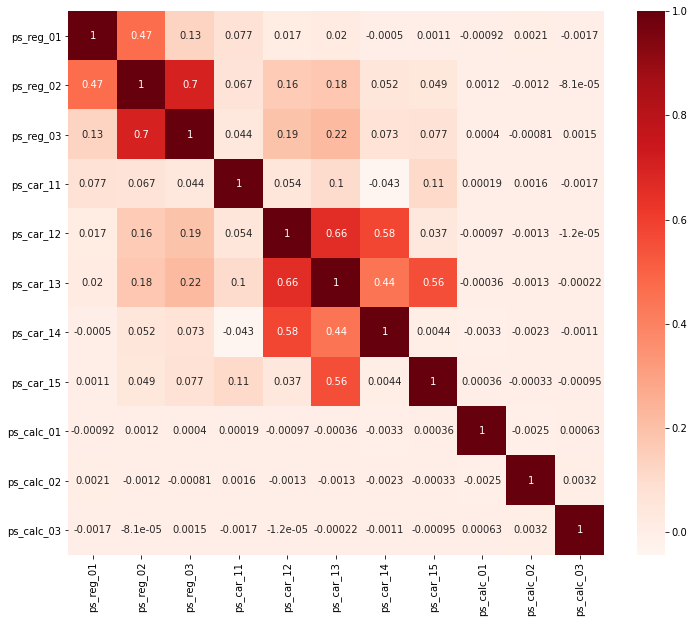

In [24]:
plt.figure(figsize=(12,10))
cor = train[interval_var].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### 14. Which interval variables have strong correlation?
-> The column "**ps_reg_02**" is  highly corrleated with "**ps_reg_03**" of **0.7**.                                                                
-> The column "**ps_car_12**" is  highly corrleated with "**ps_car_13**" of **0.6**.                                                               
-> The column "**ps_car_12**" is  highly corrleated with "**ps_car_14**" of **0.58**.                                                               
-> The column "**ps_car_13**" is  highly corrleated with "**ps_car_15**" of **0.56**.                                                               
-> The column "**ps_car_01**" is  highly corrleated with "**ps_car_02**" of **0.47**.                                                               
-> The column "**ps_car_13**" is  highly corrleated with "**ps_car_14**" of **0.44**.



### Correlation among Ordinal variables

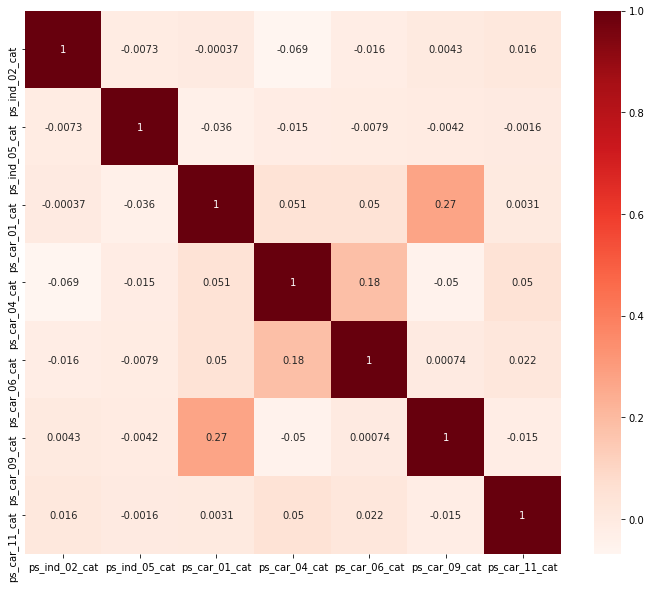

In [25]:
plt.figure(figsize=(12,10))
cor = train[ordinal].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### 15. What's the level of correlation among ordinal features?
-> The column "**ps_car_09_cat**" is highly corrleated with "**ps_car_01_cat**" of "**0.27**" which is not that significant value.                                      
-> The column "**ps_car_06**" is highly corrleated with "**ps_car_04_cat**" of "**0.18**" which is not that significant value.


#### 16. Implement Hot Encoding for categorical features
-> As there are no features which require any form of encoding as the data is already numerical. We will not be implementing any encoding process on the data.                                                                 
-> Even the missing values are either dropped or replaced with a numerical measure, there woould be no need for encoding those as well.

#### Standardized Scaling of the data

In [26]:
scale = []
for i in train.columns:
  if len(train[i].unique()) > 3 and i not in ['id','target']:
    scale.append(i)  
print("The features which are suitable for StandardScaler:" ,scale)

The features which are suitable for StandardScaler: ['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_05_cat', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


#### 17. In nominal and interval features, which features are suitable for StandardScaler?
-> The features which are suitable for StandardScaler are the features which are not not binary in nature and those are :                         
'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_05_cat', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_09_cat', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14'

#### 18. Summarize the learnings of ED

1. The data is highly imbalanced. 
2. There are missing values in the data.
3. The entire data is numerical which means even the categorical data is converted.                                                 
4. The missing values in the data are represented as "**-1**".
5. The target values 0 and 1 are not in right proportion. Only 3.6 % of the target variable is value 1.                    
6. Since the data is imbalanced, we should use sampling methods to improve the model.                                                 
7. There are no variables with string values in the observations. The entire data is numerical. We are categorizing the categorical features based on the word "cat" in the column name which counts to **14**.
8. We are categorizing the Binary features based on the word "bin" in the column name which counts to 17.There are some categorical variables which are binary in nature. If we include those then the total become 25.
9. These are the variables which are float in nature and usualy in between a range and not including id or target which was explained data dictionary.
10. We will be replacing these missing values in **ps_reg_03** and **ps_car_13** with mean.  
11. Less than 5% of the observations in ordinal variables are missing and these observations will be removed from the data .
12. We can also observe that there are no extreme outliers which need to be dealth with.
13. The number of features which have missing values is **12**.         
  a)Rejecting and droping the entire columns with more than 40 percent of the missing data. There are two columns("ps_car_03_cat","ps_car_05_cat") with more than 40% missing data.                                   
  b)Replacing the missing data with mean for the variables with missing data in between 5% and 40%. There are two columns("ps_reg_03","ps_car_14"). 
  c)Removing the observations with null values for the columns with missing data less than 5%. There are 8 columns ('ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12').
14. The final shape of the data is (582852,57) after dealing with missing values.

#### Univariate Analysis

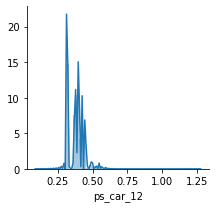

In [27]:
sns.FacetGrid(train,size=3).map(sns.distplot,"ps_car_12").add_legend()

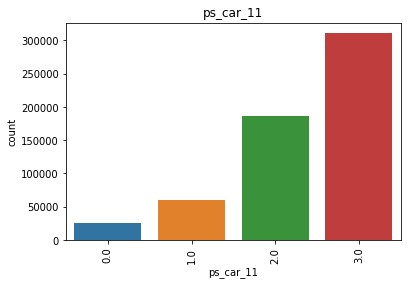

In [28]:
sns.countplot(x=train['ps_car_11'])
plt.title('ps_car_11')
plt.xticks(rotation = 90)
plt.show();

Most of the observation have value equal to "3".

#### Bivariate Analysis in between Interval variables

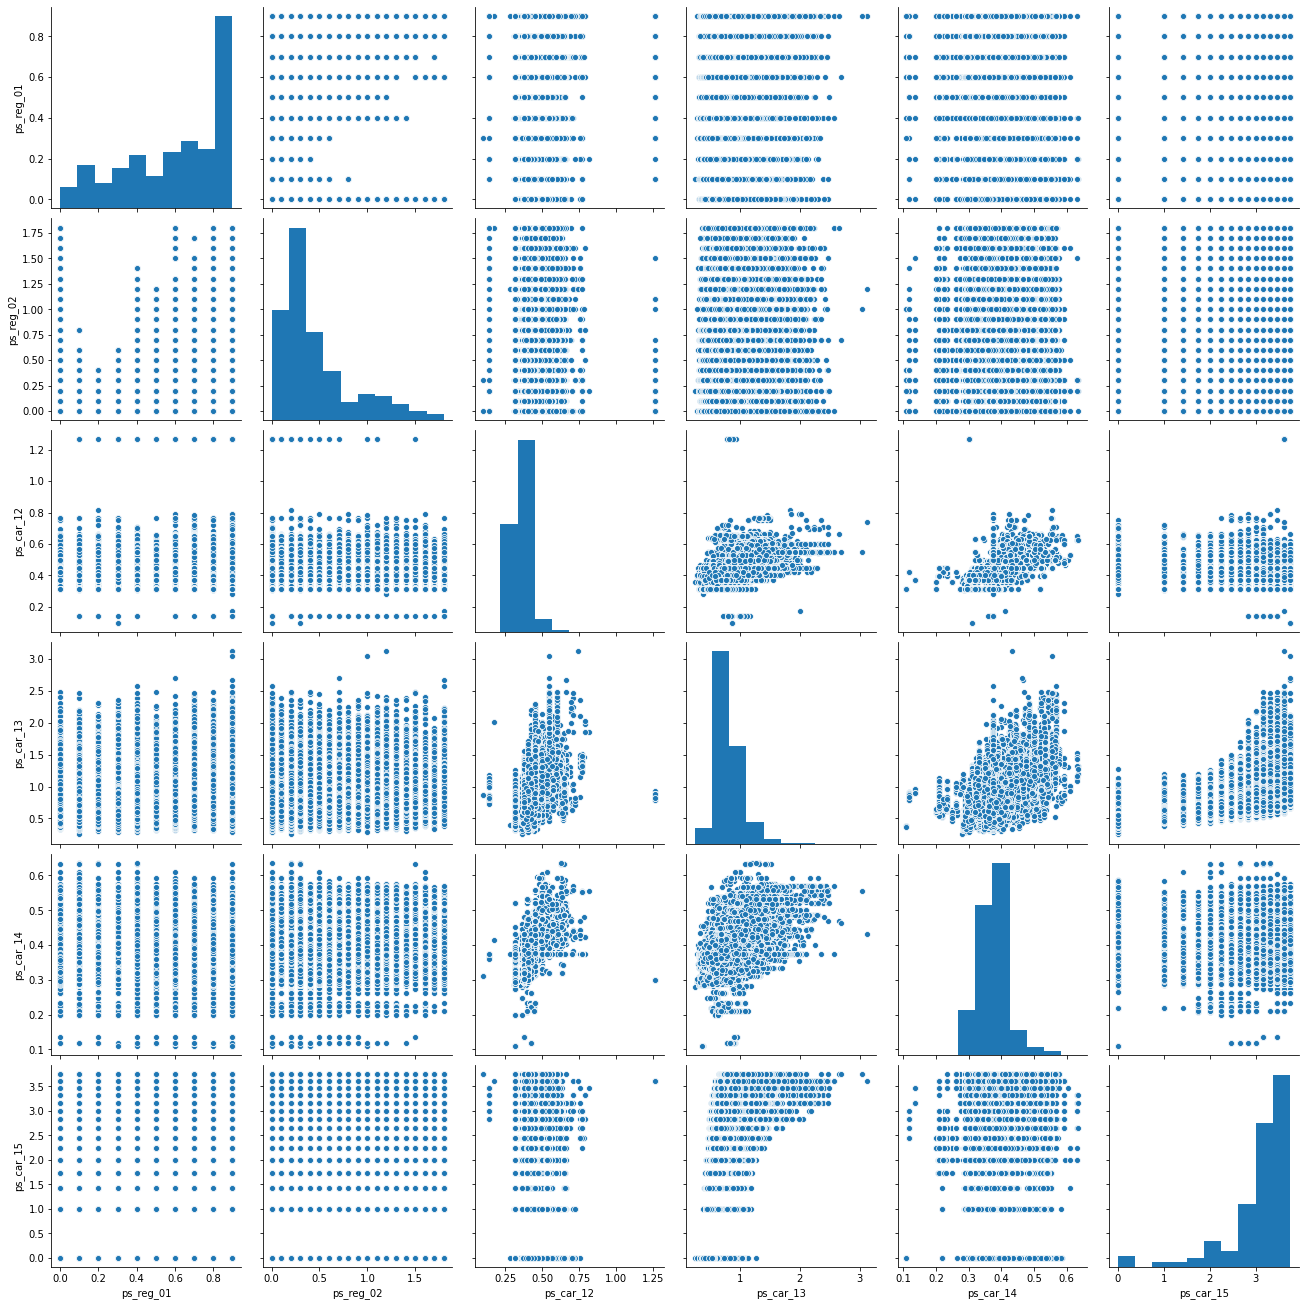

In [29]:
sns.pairplot(train, height=3,vars=['ps_reg_01','ps_reg_02','ps_car_12','ps_car_13','ps_car_14','ps_car_15',])

We can observe from the above plot that the "ps_car_12" is corelated to "ps_car13" and "ps_car_14".

#### Splitting the  dependent and independent variables

In [0]:
# Dropping the "id" and "target" variables.
y = train[['target']]
X = train.drop(['target','id'],axis=1)

#### Standardizing the train data

In [0]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#### Splitting the train data into training and testing data 

In [0]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(X,y,test_size=0.3,random_state=216)

#### Applying different modeling techiques to Un-balanced data

In [0]:
%%time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearSVC', LinearSVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RNDF', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print(name)
    print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
    print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
    print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
    print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

LR
Accuracy Score -> 96.43592441780665 
Recall Score -> 0.0 
F1 Score -> 0.0 
Precision score -> 0.0 
LinearSVC
Accuracy Score -> 96.43592441780665 
Recall Score -> 0.0 
F1 Score -> 0.0 
Precision score -> 0.0 
CART
Accuracy Score -> 92.03458846136249 
Recall Score -> 4.54760217339948 
F1 Score -> 5.238808001088583 
Precision score -> 6.177792041078305 
RNDF
Accuracy Score -> 96.43592441780665 
Recall Score -> 0.0 
F1 Score -> 0.0 
Precision score -> 0.0 
CPU times: user 5min 59s, sys: 497 ms, total: 6min
Wall time: 6min


#### 1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?
- > No, Accuracy is not the correct metric to judge the model in this case. As the data is unbalanced if we classify all the observations with the majority value, we would get high accuracy but that is not we looking for.

####2. Why do you think f1-score is 0.0?
- > F1 score is the product of precision and recall over sum of presicion and recall. As Precision and recall values are zero. F1 score is also 0.

####3. What is the precision and recall score for the model?
- > Precision and recall values are zero and so is the F1 score.


#### 4. What is the most important inference you can draw from the result?
- > Precision and recall values are zero 
The formula for :
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Lets consider the cases where the denominator is zero:

TP+FN=0 : means that there were no positive cases in the input data
TP+FP=0 : means that all instances were predicted as negative

We can assume that there were no postive case when we split the data and all the observations we classified as negative.

#### Implementing Linear SVC with parameters on unbalanced data.

In [0]:
%%time
model = LinearSVC(dual=True,max_iter=100000,C=0.5,penalty='l2', loss='l1')
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('LinearSVC')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

LinearSVC
Accuracy Score -> 96.43592441780665 
Recall Score -> 0.0 
F1 Score -> 0.0 
Precision score -> 0.0 
CPU times: user 3min 42s, sys: 138 ms, total: 3min 42s
Wall time: 3min 42s


#### 7.For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement. 
- > We have set dual=True,max_iter=100000,C=0.5,penalty='l2', loss='l1' these parameters for LinearSVC, but the there is improvement in any of the metrics.

In [0]:
%%time
model = LinearSVC(dual=False,max_iter=100000)
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('LinearSVC')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))


LinearSVC
Accuracy Score -> 96.43592441780665 
Recall Score -> 0.0 
F1 Score -> 0.0 
Precision score -> 0.0 
CPU times: user 3.48 s, sys: 128 ms, total: 3.61 s
Wall time: 3.46 s


#### 8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?
- > There seems to be no improvement in scores when we implement SVC on imabalanced data even though we optimized the parameters.

#### Balancing the data using **SMOTE** method

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=216, ratio=1.0)
x_smote,y_smote=sm.fit_sample(X,y)

In [0]:
#Splitting the balanced data 
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(x_smote,y_smote,test_size=0.3,random_state=216)

#### Applying different modeling and ensembleing techiques to **Balanced** data

In [0]:
%%time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearSVC', LinearSVC()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RNDF', RandomForestClassifier()))
models.append(('ADBC', AdaBoostClassifier(n_estimators=100)))
models.append(('GCB', GradientBoostingClassifier(n_estimators=100)))
models.append(('XGB', XGBClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print(name)
    print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
    print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
    print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
    print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

LR
Accuracy Score -> 58.772304353240465 
Recall Score -> 59.036130000242 
F1 Score -> 58.39544479385776 
Precision score -> 57.76851627111219 
LinearSVC
Accuracy Score -> 58.764891806467304 
Recall Score -> 59.01433377830665 
F1 Score -> 58.420435791336786 
Precision score -> 57.838372237581325 
CART
Accuracy Score -> 95.5930926924149 
Recall Score -> 95.00455724602116 
F1 Score -> 95.62949349408218 
Precision score -> 96.26270579390122 
RNDF
Accuracy Score -> 98.16346741147936 
Recall Score -> 100.0 
F1 Score -> 98.13233467211829 
Precision score -> 96.3331537600862 
ADBC
Accuracy Score -> 97.36202285436421 
Recall Score -> 99.87346348517715 
F1 Score -> 97.29859388426189 
Precision score -> 94.85315447048586 
GCB
Accuracy Score -> 97.9393119970587 
Recall Score -> 100.0 
F1 Score -> 97.89959140252896 
Precision score -> 95.88560197491105 
XGB
Accuracy Score -> 97.96540416170026 
Recall Score -> 100.0 
F1 Score -> 97.92673789036063 
Precision score -> 95.93769794990499 
CPU times: use

#### 5. What is the accuracy score and f1-score for the improved Logistic Regression model?
- > Accuracy and F1 score have improved on the new balanced data which is 58.7% and 58.3% respectively.


#### 6. Why do you think f1-score has improved?
- > F1 score has improved because Precision and recall have increased. We can infer that there are postive case when we split the new balanced data and some of the observations are classified as false negative/false positive.

#### 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?
- > There could be multiple reasons which needs to be looked into:         
a) Parameter tuning, the default parameters does not give good f1 score like expected.                                                             
b) XGBoost uses the feature importances and selectd these features based on number of feature importance score and maybe the features which got left out were the reason for the low f1 score. Parameter tuning or resampling might imorove the model here.

#### 10. What is the increase in number of features after one-hot encoding of the data?
- > There is no increase in number of features as we did not use one-hot encoding as all the data in numerical.

#### 11. Is there any improvement in scores after encoding?
- > There would be no improvement as we did not use any encoding technique.                                                                 
Even if we did encoding, we have to run the model after encoing because models does not run if there is a categorical(string,texts) variable in the data.

#### 12. If not missing a positive sample is the priority which model is best so far?
- > Missing a positive sample indicate we have False negative and if that is not our priority to check the model. We should eliminate Recall as it gives importance to False negatives. So we can check Accuracy, Precision , F1 score or  ROC- AUC curve to judge the model. Based on the F1 score, Random Forest Classifier is best so far.

#### 13. If not marking negative sample as positive is top priority, which model is best so far?
- > Missing a negative sample indicate we have False positive and if that is not our priority to check the model. We should eliminate Precision as it gives importance to False negatives. So we can check Accuracy, Recall , F1 score or  ROC- AUC curve to judge the model. Based on the F1 score, Random Forest Classifier is best so far.

#### 14. Do you think using AdaBoost can give any significant improvement over XGBoost?
- > Adaboost did not give any significat improvment over XGBoost.   
Based on the F1 score, XGBoost performed better than AdaBoost but not significantly.

#### Implmenting MLP classifier on the balanced data

In [0]:
%%time
model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(50,50,50),max_iter=500,random_state=1)
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('MLPClassifier')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))


MLPClassifier
Accuracy Score -> 85.57933500560388 
Recall Score -> 90.98758953459051 
F1 Score -> 84.59179470932995 
Precision score -> 79.03610606266909 
CPU times: user 49min 7s, sys: 8min 52s, total: 57min 59s
Wall time: 33min 20s


In [0]:
%%time
model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(100,100,100),max_iter=500,random_state=1)
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('MLPClassifier')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

MLPClassifier
Accuracy Score -> 89.13379943427444 
Recall Score -> 91.38408975714759 
F1 Score -> 88.85157333722714 
Precision score -> 86.45563850129352 
CPU times: user 1h 50min 31s, sys: 20min 44s, total: 2h 11min 16s
Wall time: 1h 18min 21s


In [0]:
%%time
model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(150,150,150),max_iter=500,random_state=1)
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('MLPClassifier')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

MLPClassifier
Accuracy Score -> 90.49207450499013 
Recall Score -> 92.25392120538471 
F1 Score -> 90.30795595706932 
Precision score -> 88.44238954765302 
CPU times: user 3h 39min 56s, sys: 14min 9s, total: 3h 54min 6s
Wall time: 2h 21min 7s


####MLP Classifier with 2 hidden layers of size 150 neurons

In [0]:
%%time

model = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=[150,150],max_iter=500,random_state=216)
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('MLPClassifier')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

MLPClassifier
Accuracy Score -> 90.75269964953479 
Recall Score -> 92.50300879493906 
F1 Score -> 90.57604912009283 
Precision score -> 88.72773341068796 
CPU times: user 2h 25min 31s, sys: 8min 41s, total: 2h 34min 12s
Wall time: 1h 34min 17s


#### 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?
- > Cross validation i.e. by checking which model with certain layers will give good F1 score.                                                        
- > Grid search parameter tuning is another method to figure out right no. of layers and size. 


#### 16. At what layer size we get the best f1-score?
- >We can observed that difference between hidden layer 2 gave better f1 score than with 1 layer. We could use 2 hidden layers and change no of neuron to get a better model.


In [0]:
#### Variable Reduction using Principal Component Analysis

#### Variable Reduction using Principal Component Analysis

#### At 95% explained variance

In [0]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 0.95) 
pca.fit(x_smote) 
x_pca = pca.transform(x_smote) 
  
x_pca.shape 

(1124220, 45)

#### Splitting the new data and running modeling techniques on them to figure out the better model

In [0]:
#Splitting the balanced data 
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(x_pca,y_smote,test_size=0.3,random_state=216)

In [0]:
%%time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RNDF', RandomForestClassifier()))
models.append(('ADBC', AdaBoostClassifier(n_estimators=100)))
models.append(('GCB', GradientBoostingClassifier(n_estimators=100)))
models.append(('XGB', XGBClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print(name)
    print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
    print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
    print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
    print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

LR
Accuracy Score -> 58.4772849916683 
Recall Score -> 58.83256152542684 
F1 Score -> 57.86791340240922 
Precision score -> 56.934388671493444 
CART
Accuracy Score -> 82.84499475191689 
Recall Score -> 80.14766958929395 
F1 Score -> 83.61492322592704 
Precision score -> 87.39573405004765 
RNDF
Accuracy Score -> 97.2191089525775 
Recall Score -> 97.30923885323875 
F1 Score -> 97.22130873129441 
Precision score -> 97.13353737590205 
ADBC
Accuracy Score -> 70.06190959064952 
Recall Score -> 69.41260499400033 
F1 Score -> 70.64190574217352 
Precision score -> 71.91553348054393 
GCB
Accuracy Score -> 70.23714219636726 
Recall Score -> 69.25934459949308 
F1 Score -> 71.06003644163572 
Precision score -> 72.95686098070672 
XGB
Accuracy Score -> 70.08296122348531 
Recall Score -> 69.06522409395409 
F1 Score -> 70.94764241125931 
Precision score -> 72.93554899093648 
CPU times: user 1h 25min 25s, sys: 2.02 s, total: 1h 25min 27s
Wall time: 1h 25min 33s


#### At 99% explained variance

In [35]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 0.99) 
pca.fit(x_smote) 
x_pca = pca.transform(x_smote) 
  
x_pca.shape 

(1124220, 50)

In [0]:
#Splitting the balanced data 
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(x_pca,y_smote,test_size=0.3,random_state=216)

In [0]:
%%time
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RNDF', RandomForestClassifier()))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(Train_X,Train_Y)
    predictions_NB = model.predict(Test_X)
    # Use accuracy_score function to get the accuracy
    print(name)
    print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
    print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
    print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
    print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

LR
Accuracy Score -> 58.72278854079569 
Recall Score -> 58.95467946437722 
F1 Score -> 58.41652179627339 
Precision score -> 57.8881002137119 
CART
Accuracy Score -> 82.86604638475269 
Recall Score -> 80.10662967859388 
F1 Score -> 83.65211339724965 
Precision score -> 87.5259739875325 
RNDF
Accuracy Score -> 97.43318330338664 
Recall Score -> 97.56226406134998 
F1 Score -> 97.4341647030928 
Precision score -> 97.30640129292738 


- > Balanced data - Before PCA - Shape:(582852,57)                          
Random Forest classifier performed well with the F1 score of 98.13
- > Balanced data - After PCA at 95% explained variance -Shape :(1124220, 45)                                                                        
Random Forest classifier performed well with the F1 score of 97.22
- > Balanced data - After PCA at 99% explained variance - Shape:(1124220,50)                                                  
Random Forest classifier performed well with the F1 score of 97.43

We can infer that at 95% variance with 45 variables and double the number of observations we could achieve 97.22 F1 score which takes a lot a time when compared to the model before PCA with original number of rows and columns.




#### Random Forest Classifier is the better model so far on balanced data before and after variable reduction (PCA method). 
But the final model would Random Forest Classifier on the original balanced data with all the columns.

#### Final Model

In [40]:
%%time
# Dropping the "id" and "target" variables.
y = train[['target']]
X = train.drop(['target','id'],axis=1)

#Scaling the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

#Balancing the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=216, ratio=1.0)
x_smote,y_smote=sm.fit_sample(X,y)

#Splitting the balanced data 
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(x_smote,y_smote,test_size=0.3,random_state=216)


#Modeling
model = RandomForestClassifier()
model.fit(Train_X,Train_Y)
predictions_NB = model.predict(Test_X)

print('Random Forest Classifier')
print("Accuracy Score -> {} " .format(accuracy_score(predictions_NB, Test_Y)*100))
print("Recall Score -> {} " .format(recall_score(predictions_NB, Test_Y)*100))
print("F1 Score -> {} " .format(f1_score(predictions_NB, Test_Y)*100))
print("Precision score -> {} " .format(precision_score(predictions_NB, Test_Y)*100))

Random Forest Classifier
Accuracy Score -> 98.16346741147936 
Recall Score -> 100.0 
F1 Score -> 98.13233467211829 
Precision score -> 96.3331537600862 
CPU times: user 10min 24s, sys: 402 ms, total: 10min 24s
Wall time: 10min 26s
